In [1]:
from rossby_waves import *
from math import floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel
from matplotlib.animation import FuncAnimation, PillowWriter

Motion of the center of mass, otherwise known as the first moment of the particle displacements can be written as: $ M_x(t) = \frac{1}{N} \sum_{i=1}^N (x_i(t) - x_i(0))$ for the $x$ direction. We want  $D_x(t) = \frac{1}{N(N-1)} \sum_{i=1}^N (x_i(t) - x_i(0))^2$ and we will consider $x$ and $y$ directions separately.

In [2]:
def dxt(ro, x, t, e):
    p1, p2 = trajectory(ro, x, 0, t, (t/2e3), eps=e)
    p3, p4 = np.array(p1), np.array(p2)
    a = 0
    for i in range(len(p1)):
        a += (p3[i,0] - p3[i,2000]) ** 2
    return a/len(p1)

def dyt(ro, x, t, e):
    p1, p2 = trajectory(ro, x, 0, t, (t/2e3), eps=e)
    p3, p4 = np.array(p1), np.array(p2)
    a = 0
    for i in range(len(p1)):
        a += (p4[i,0] - p4[i,2000]) ** 2
    return a/len(p2)

In [3]:
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
x = grid(100)

In [4]:
y = dxt(ro, x, 2e13, 0)


In [5]:
p1, p2 = trajectory(ro, x, 0, 2e13, (2e13/2e3))

In [6]:
print(p1)

In [14]:
def f1(t):
    return dxt(ro, x, t, 0)

def f2(t):
    return dyt(ro, x, t, 0)
    


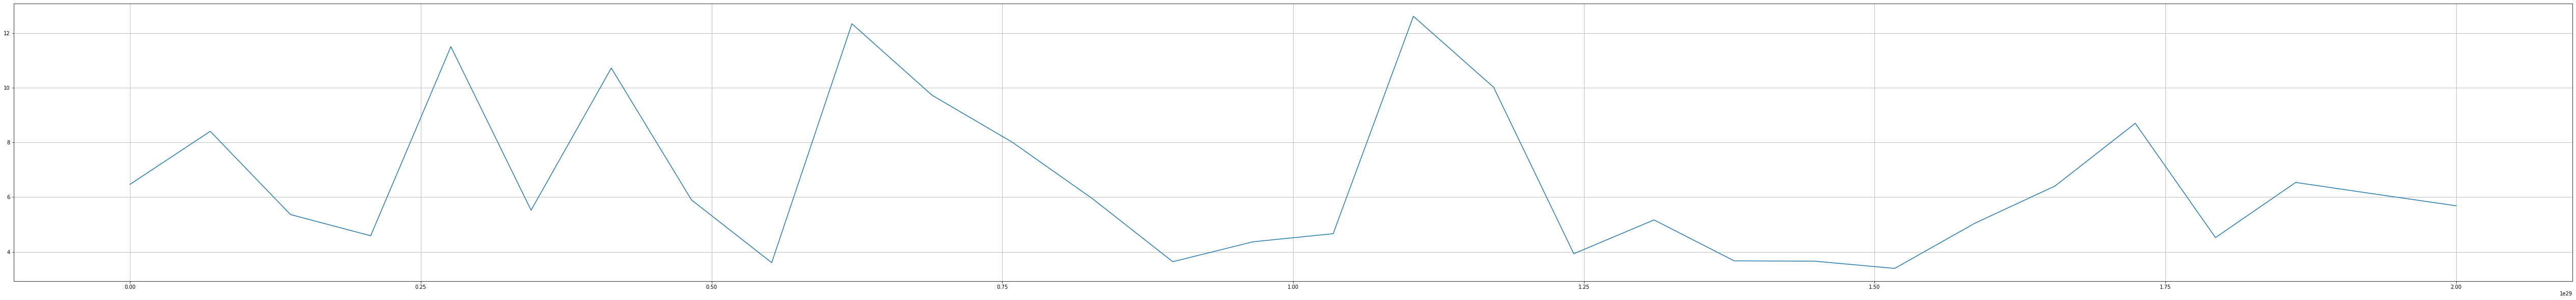

In [45]:
t = np.linspace(1, 2e29,30)
arr = []
for i in t:
    arr.append(dyt(ro, x, i, 0))
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
fig.show
plt.savefig('plot.png')

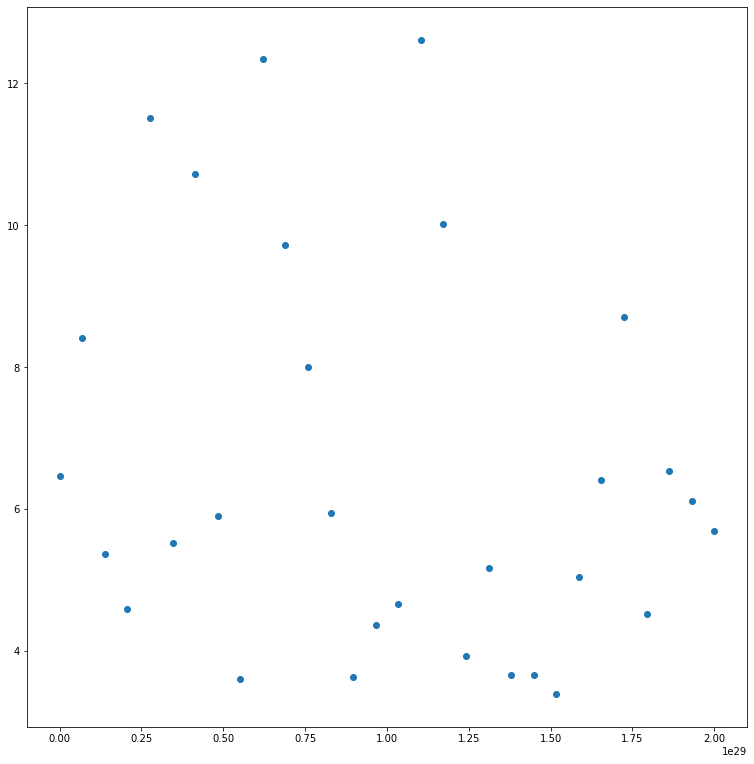

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(t, arr)
plt.show()